In [1]:
#from parser
import pandas as pd

# Manually change file ext from .irc to .txt before use
dirid="/Users/admin/Desktop/Thesis/hasan_logs/nicki/day2/"
docid ="v1150496968"
logname=dirid + docid + ".txt"

raw_log=pd.read_csv(logname,header=None,delimiter='\n',error_bad_lines=False,encoding='utf-8')

raw_log['raw_str']=raw_log[0]
raw_log1=raw_log['raw_str'].str.split(']', n = 1, expand = True)
raw_log2=raw_log1[1].str.split('>', n = 1, expand = True)
parsed_log=pd.concat([raw_log1,raw_log2], axis=1, join='inner')
parsed_log.columns=['timecode','raw','username','message']
parsed_log=parsed_log.drop(columns='raw')
parsed_log['username']=parsed_log['username'].map(lambda x: x.lstrip(' <'))
parsed_log['timecode']=parsed_log['timecode'].map(lambda x: x.lstrip(' ['))
parsed_log['timecode']=parsed_log['timecode'].replace({',':':'}, regex=True)
parsed_log['message']=parsed_log['message'].map(lambda x: x.lstrip(' '))
parsed_log.index.names=['msg_num']

#export initial parsed csv
parsed_log.to_csv(dirid + docid + "_initialparsed.csv",index=False)

In [2]:
#get most common messages
count = parsed_log['message'].value_counts()
print(count.head(20))

KEKW          13007
OMEGALUL       4296
YEP            3650
PepeLa         2893
monkaW         2058
KEKWait        1521
Sadge          1064
LETSGO         1063
D:             1036
PogU           1018
hasL            874
GIGAHAS         755
HOGGERS         690
gachiHYPER      679
Hmm             663
NODDERS         649
LUL             600
COPIUM          525
unPOGGERS       518
LULW            495
Name: message, dtype: int64


In [3]:
total_rows = parsed_log.count
print(total_rows)

<bound method DataFrame.count of              timecode         username            message
msg_num                                                  
0         0:00:00:023           HCTR17           peepoHey
1         0:00:02:050           HCTR17              !cock
2         0:00:02:118         yoDeRock               PogU
3         0:00:02:134      bythonbicks          PogU live
4         0:00:02:170       Shorecross                OMG
...               ...              ...                ...
202258   08:32:49:145         chemmy96              Sadge
202259   08:32:49:629  thadrunkinninja  <message deleted>
202260   08:32:49:808         brad2244          hasL hasL
202261   08:32:50:223       FusedAtoms             COPIUM
202262   08:32:51:685         JustGery  BibleThump DONNIE

[202263 rows x 3 columns]>


In [4]:
# from infoget
csvname=dirid + docid + "_initialparsed.csv"

df = pd.read_csv(csvname)
df.index.names=['msg_num']

#organize by time
df=df.set_index('timecode')

In [5]:
#remove channel's main bot messages
df = df[df.username != 'Fossabot']
df.head(10)

,username,message
timecode,,
0:00:00:023,HCTR17,peepoHey
0:00:02:050,HCTR17,!cock
0:00:02:118,yoDeRock,PogU
0:00:02:134,bythonbicks,PogU live
0:00:02:170,Shorecross,OMG
0:00:02:740,JohnAtoms,DANKHACKERMANS cusst
0:00:02:899,SarahLawl,PogU
0:00:03:057,callmedaddy47022,POG
0:00:03:198,CuriousCarrots,PogU


In [6]:
#get total message number
num_messages = df.shape[0]
print("Total messages: {:,}".format(num_messages))

Total messages: 200,296


In [7]:
#tokenize df into subframe
dft=df['message'].str.split(r"[\s',]+", expand=True).stack()\
    .to_frame().rename(columns={0:'msg_token'})

dft.index.names = ['timecode','num_in_msg']

In [8]:
#merge dfs
dft=dft.merge(df,how='inner',on='timecode')

In [9]:
#rearrange columns
dft=dft[["username","message","msg_token"]]
dft.head(30)

,username,message,msg_token
timecode,,,
0:00:00:023,HCTR17,peepoHey,peepoHey
0:00:02:050,HCTR17,!cock,!cock
0:00:02:118,yoDeRock,PogU,PogU
0:00:02:134,bythonbicks,PogU live,PogU
0:00:02:134,bythonbicks,PogU live,live
0:00:02:170,Shorecross,OMG,OMG
0:00:02:740,JohnAtoms,DANKHACKERMANS cusst,DANKHACKERMANS
0:00:02:740,JohnAtoms,DANKHACKERMANS cusst,cusst
0:00:02:899,SarahLawl,PogU,PogU


In [10]:
#save to csv 
dft.to_csv(dirid + docid + "_info_withstopwords.csv",index=True)

In [11]:
#from stopwords
import numpy as np
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
# need to remove different case stopwords
upperstop = list(map(lambda x: x.upper(), stop))
capstop = list(map(lambda x: x.capitalize(), stop))
stop = stop + upperstop + capstop

csvname=dirid + docid + "_info_withstopwords.csv"

df = pd.read_csv(csvname)
df.index.names=['msg_num']

In [12]:
def convert_timestamp(timestamp):
  (h, m, s, ms) = timestamp.split(":")
  # (s, ms) = seconds.split(',')
  h = int(h)
  m = int(m)
  s = int(s)
  ms = int(ms) * 1000
  ts = pd.Timestamp(year=2021, month=10, day=16, 
                    hour=h, minute=m, second=s, microsecond=ms)
  return ts

In [13]:
df.loc[:, "timestamp"] = df.timecode.apply(convert_timestamp)

In [14]:
df.set_index("timestamp", inplace=True)

In [15]:
df.drop("timecode", axis=1, inplace=True)

In [16]:
df.head(10)

,username,message,msg_token
timestamp,,,
2021-10-16 00:00:00.023,HCTR17,peepoHey,peepoHey
2021-10-16 00:00:02.050,HCTR17,!cock,!cock
2021-10-16 00:00:02.118,yoDeRock,PogU,PogU
2021-10-16 00:00:02.134,bythonbicks,PogU live,PogU
2021-10-16 00:00:02.134,bythonbicks,PogU live,live
2021-10-16 00:00:02.170,Shorecross,OMG,OMG
2021-10-16 00:00:02.740,JohnAtoms,DANKHACKERMANS cusst,DANKHACKERMANS
2021-10-16 00:00:02.740,JohnAtoms,DANKHACKERMANS cusst,cusst
2021-10-16 00:00:02.899,SarahLawl,PogU,PogU


In [17]:
df = df[df['msg_token'].notnull()]

In [18]:
nonstop = df
#remove nltk stopwords
nonstop['msg_token'] = nonstop['msg_token'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#replace empty token rows with NaNs
nonstop['msg_token'].replace('', np.nan, inplace=True)
#remove NaN rows
nonstop.dropna(subset=['msg_token'], inplace=True)

In [19]:
# nonstop.head(10)

# get most freq terms
count = nonstop['msg_token'].value_counts()
print(count.head(15))

KEKW         26557
@HasanAbi    13717
OMEGALUL      9864
hasL          7645
PepeLa        7407
GIGAHAS       7122
LETSGO        6733
YEP           5971
@hasanabi     4805
monkaW        3943
KEKWait       3461
PogU          3253
like          3004
HOGGERS       2892
PogO          2879
Name: msg_token, dtype: int64


In [20]:
nonstop.head(10)

,username,message,msg_token
timestamp,,,
2021-10-16 00:00:00.023,HCTR17,peepoHey,peepoHey
2021-10-16 00:00:02.050,HCTR17,!cock,!cock
2021-10-16 00:00:02.118,yoDeRock,PogU,PogU
2021-10-16 00:00:02.134,bythonbicks,PogU live,PogU
2021-10-16 00:00:02.134,bythonbicks,PogU live,live
2021-10-16 00:00:02.170,Shorecross,OMG,OMG
2021-10-16 00:00:02.740,JohnAtoms,DANKHACKERMANS cusst,DANKHACKERMANS
2021-10-16 00:00:02.740,JohnAtoms,DANKHACKERMANS cusst,cusst
2021-10-16 00:00:02.899,SarahLawl,PogU,PogU


In [21]:
#export to csv
nonstop.to_csv(dirid + docid + "_nostops.csv",index=True)

### Begin deliverables / info get

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("dark")
sns.set_style("ticks")

#csvname=dirid + docid + "_nsnb.csv"

#df=nonstop
# df = pd.read_csv(csvname)
# df.head(10)

In [38]:
user_freq = nonstop.groupby(["username"]).count()
print("Unique usernames: {:,}".format(user_freq.shape[0]))

Unique usernames: 20,831


In [39]:
print("Mean messages sent per user: {:,.2f} (SD={:.2f})".format(user_freq.message.mean(), user_freq.message.std()))

Mean messages sent per user: 34.09 (SD=93.74)


In [40]:
print("Median messages sent per user: {:,.0f}".format(user_freq.message.median()))

Median messages sent per user: 9


In [41]:
user_freq.describe()

,message,msg_token
count,20831.000000,20831.000000
mean,34.092026,34.092026
std,93.743083,93.743083
min,1.000000,1.000000
25%,3.000000,3.000000
50%,9.000000,9.000000
75%,28.000000,28.000000
max,3373.000000,3373.000000


In [27]:
user_freq.quantile(q=[0.0,0.5,0.90,0.95,0.99,1.0])

,message,msg_token
0.00,1.0,1.0
0.50,9.0,9.0
0.90,77.0,77.0
0.95,138.0,138.0
0.99,403.7,403.7
1.00,3373.0,3373.0


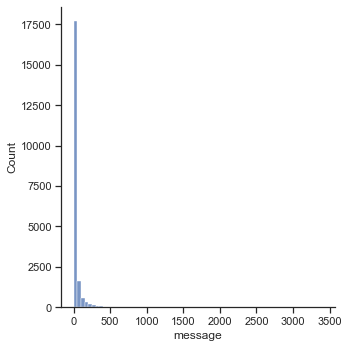

In [42]:
# Most viewers sent VERY FEW messages
sns.displot(user_freq.message, binwidth=50)

In [29]:
# a few users sent a LOT of messages

n = 10
print("Top {} users by number of messages sent:".format(n))
user_freq.sort_values(by="message", ascending=False).head(n)

Top 10 users by number of messages sent:


,message,msg_token
username,,
hughjanus756,3373,3373
seantuf,2199,2199
TrvpPapi,2059,2059
SaintBeau,1989,1989
dankherm,1899,1899
Ragg3d,1894,1894
Tanlere,1823,1823
LilAnakin,1781,1781
jw10387,1776,1776


In [30]:
activity_over_time = nonstop.message.groupby(nonstop.index.to_period(freq='T')).count()

In [31]:
activity_over_time.head(10)

timestamp
2021-10-16 00:00     361
2021-10-16 00:01     558
2021-10-16 00:02     898
2021-10-16 00:03     898
2021-10-16 00:04     697
2021-10-16 00:05     873
2021-10-16 00:06    1122
2021-10-16 00:07    1461
2021-10-16 00:08    1849
2021-10-16 00:09    1738
Freq: T, Name: message, dtype: int64

In [32]:
chunks = activity_over_time.resample(rule="5Min").sum()

In [33]:
chunks = chunks.reset_index()

In [34]:
chunks.loc[:, "timestamp"] = chunks.timestamp.dt.to_timestamp()

[Text(0.5, 0, 'Hours live'), Text(0, 0.5, '# messages')]

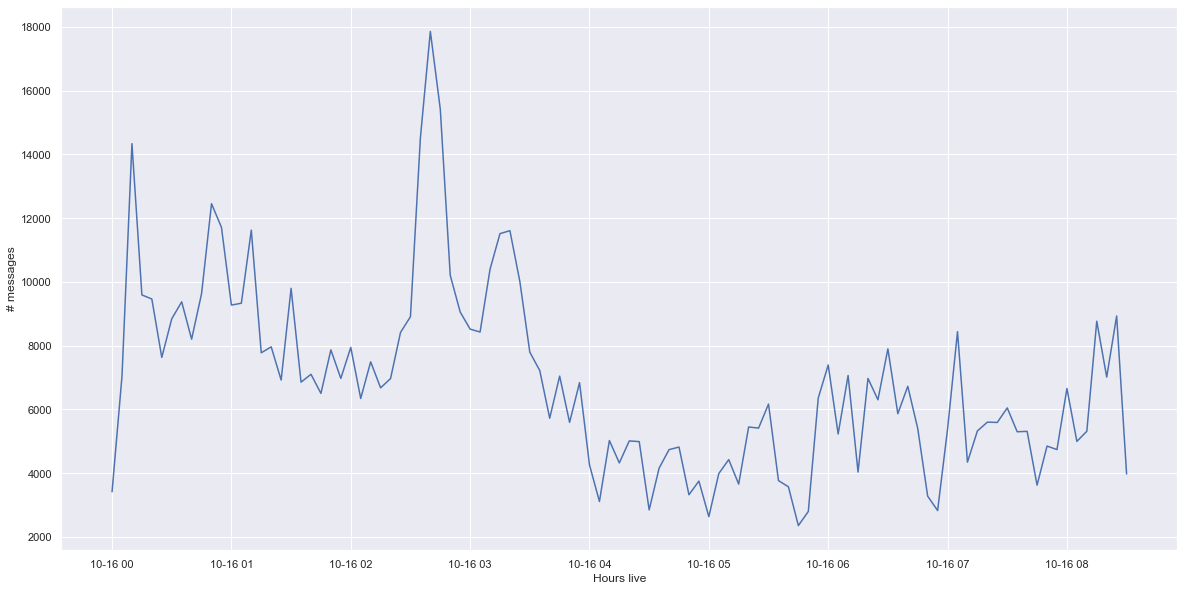

In [43]:
sns.set(rc = {'figure.figsize':(20,10)})
p = sns.lineplot(x=chunks.timestamp, y=chunks.message)
p.set(xlabel = "Hours live", ylabel = "# messages")

In [36]:
# single item function
def emotechunker(emoteid):
    emoteid = nonstop.loc[nonstop['msg_token']]

SyntaxError: unexpected EOF while parsing (<ipython-input-36-3f12b09f99bb>, line 3)